In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py, os, pickle

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from tqdm import tqdm
from trianglechain import TriangleChain

from msfm.utils import logger, files, scales, power_spectra, parameters, observation

from deep_lss.models.grid_model import GridLossModel
from deep_lss.utils import optimization, configuration
from deep_lss.nets.mlp import MultiLayerPerceptron

from msi.utils import preprocessing, dataset, input_output

In [9]:
conf = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v14/extended.yaml"
conf = files.load_config(conf)

data_vec_pix, patches_pix_dict, corresponding_pix_dict, _ = files.load_pixel_file(conf)

metacal_mask = files.get_tomo_masks(conf)["metacal"]
maglim_mask = files.get_tomo_masks(conf)["maglim"]

metacal_dv_mask = files.get_tomo_dv_masks(conf)["metacal"]
maglim_dv_mask = files.get_tomo_dv_masks(conf)["maglim"]

# lensing

In [6]:
buzzard_indices = list(range(0, 16))
buzzard_indices.remove(1)
for i in buzzard_indices:
    out_label = f"mocks/pred/Buzzard_{i}"
    lensing_file = f"/pscratch/sd/j/jbucko/DESY3/mock_observations/lensing/buzzard_flock/{i}/DESY3_mock_observation_buzzard_flock_v14_shear_noise+WL.h5"

with h5py.File(lensing_file, "r") as f_in:
    gamma1 = []
    gamma2 = []
    for j in range(1,5):
        gamma1.append(f_in[f"metacal/raw_gamma1_bin{j}"])
        gamma2.append(f_in[f"metacal/raw_gamma2_bin{j}"])
    gamma1 = np.stack(gamma1, axis=-1)
    gamma2 = np.stack(gamma2, axis=-1)
    
    wl_map = np.stack([gamma1, gamma2], axis=-1)

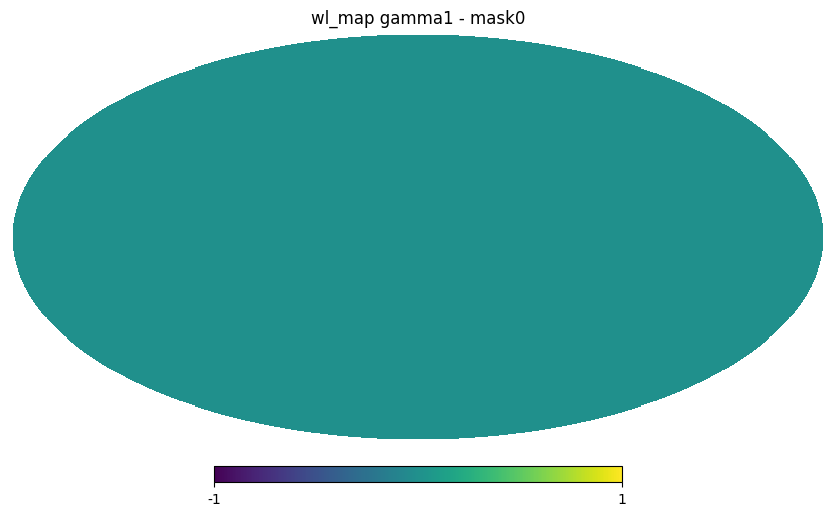

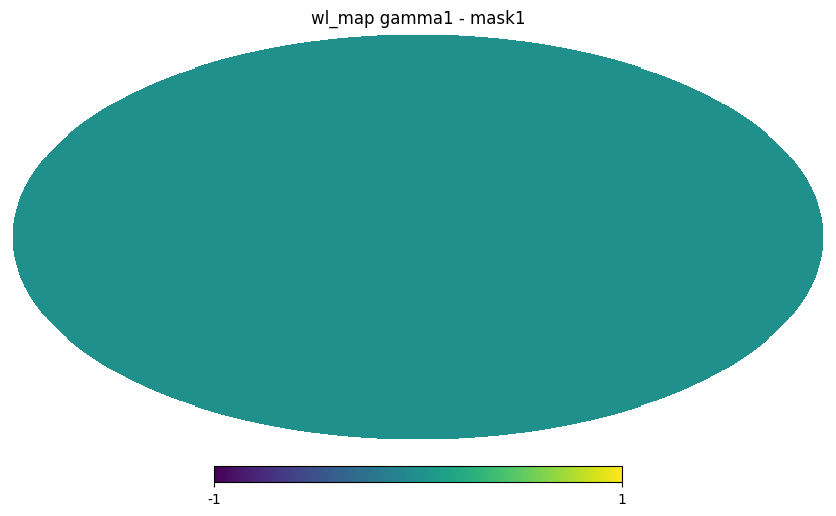

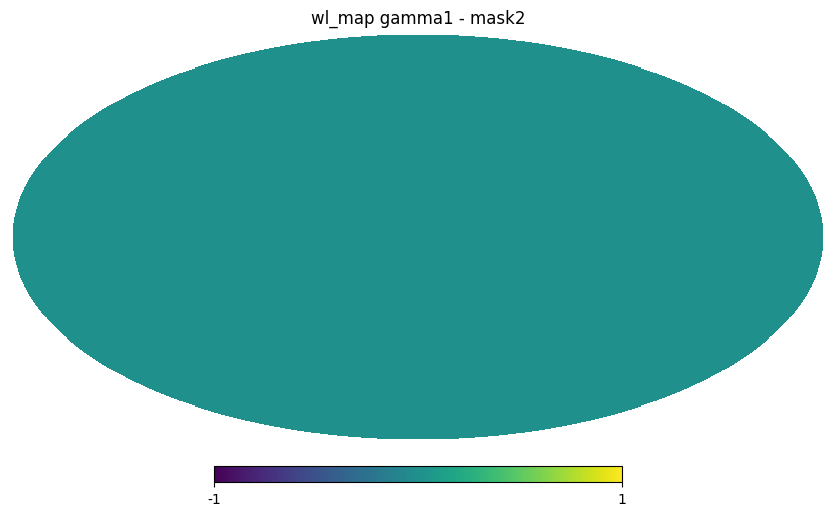

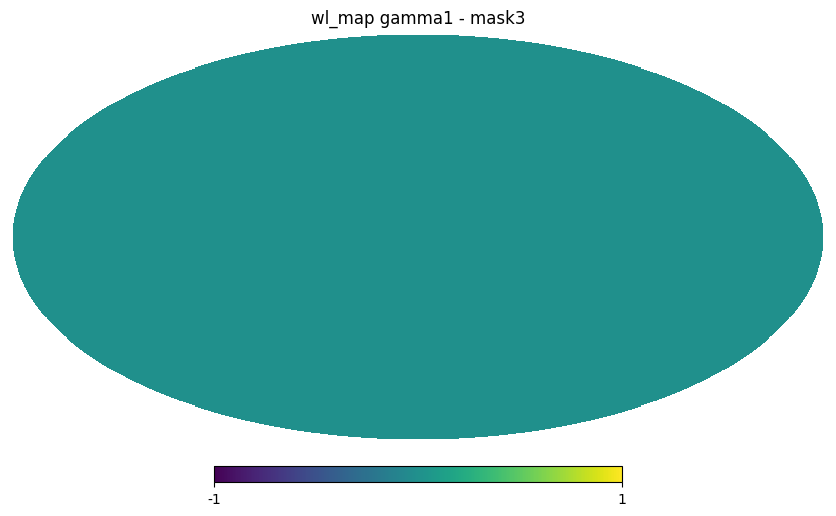

In [18]:
for i in range(4):
    # hp.mollview(metacal_mask[:,i], nest=True, title=f"mask {i}")
    # hp.mollview(wl_map[:,i,0], nest=False, title=f"wl_map gamma1 {i}")

    current_wl_map = wl_map[:,i,0]
    wl_mask = np.zeros_like(current_wl_map)
    wl_mask[current_wl_map != 0] = 1
    wl_mask = hp.reorder(wl_mask, r2n=True)
    # hp.mollview(wl_mask, nest=True, title=f"wl_map mask {i}")
    hp.mollview(wl_mask - metacal_mask[:,i], nest=True, title=f"wl_map gamma1 - mask{i}")

In [8]:
wl_map.shape

(3145728, 4, 2)